<a href="https://colab.research.google.com/github/YeceniaQuijada25/Telecom-2/blob/main/Telecom_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Acerca del desafío

####Telecom X – Parte 2: Predicción de Cancelación (Churn)

🎯 Misión
Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.
La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

•
Preparar los datos para el modelado (tratamiento, codificación, normalización).

•
Realizar análisis de correlación y selección de variables.

•
Entrenar dos o más modelos de clasificación.

•
Evaluar el rendimiento de los modelos con métricas.

•
Interpretar los resultados, incluyendo la importancia de las variables.

•
Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#Análisis exploratorio

****Importando las librerías****

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# 🛠️ Preparación de los datos

****Leyendo los datos****

In [ ]:

ruta= "/content/datos_tratados.csv"
datos= pd.read_csv(ruta)
datos.head(5)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


****Obteniendo información acerca de las columnas, registros y tipos de datos****

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


####Estadisticas descriptiva

In [ ]:
datos.describe()

,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


****Verificando sí posee valores nulos****

In [ ]:
datos.isnull().sum()

,0
CustomerID,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


****Verificando sí posee valores vacios****

In [ ]:
datos.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
CustomerID,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


****Valores duplicados****

In [ ]:
print(f"La cantidad de duplicados es: {datos.duplicated().sum()}")

La cantidad de duplicados es: 0


In [ ]:
datos=datos.drop(columns=['CustomerID','ChargesDaily'])

****Eliminando columnas irrelevantes****

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
datos.select_dtypes(include=['number']).corr()

,Tenure,ChargesMonthly,ChargesTotal
Tenure,1.000000,0.247900,0.826178
ChargesMonthly,0.247900,1.000000,0.651174
ChargesTotal,0.826178,0.651174,1.000000


****Gráfico****

*****Variables categóricas*****

In [ ]:


px.histogram(datos, x = 'Gender', text_auto = True)

In [ ]:


px.histogram(datos, x = 'SeniorCitizen', text_auto = True)

In [ ]:
px.histogram(datos, x = 'Partner', text_auto = True)

In [ ]:
px.histogram(datos, x = 'Dependents', text_auto = True)

In [ ]:
px.histogram(datos, x = 'PhoneService', text_auto = True)

In [ ]:
px.histogram(datos, x = 'MultipleLines', text_auto = True)

In [ ]:
px.histogram(datos, x = 'InternetService', text_auto = True)

In [ ]:
px.histogram(datos, x = 'OnlineSecurity', text_auto = True)

In [ ]:
px.histogram(datos, x = 'OnlineBackup', text_auto = True)

In [ ]:
px.histogram(datos, x = 'DeviceProtection', text_auto = True)

In [ ]:
px.histogram(datos, x = 'TechSupport', text_auto = True)

In [ ]:
px.histogram(datos, x = 'StreamingTV', text_auto = True)

In [ ]:
px.histogram(datos, x = 'StreamingMovies', text_auto = True)

In [ ]:
px.histogram(datos, x = 'Contract', text_auto = True)

In [ ]:
px.histogram(datos, x = 'PaperlessBilling', text_auto = True)

In [ ]:
px.histogram(datos, x = 'PaymentMethod', text_auto = True)

*****Variables numéricas*****

In [ ]:
px.box(datos, x = 'Tenure', color = 'Churn')

In [ ]:
px.box(datos, x = 'ChargesMonthly', color = 'Churn')

****Encoding****

#####Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

####Variables explicativas

In [ ]:
X=datos.drop('Churn', axis=1)

####Visualización de X

In [ ]:
X

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,Male,No,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,Male,No,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


####Variables respuestas

In [ ]:
y=datos['Churn']

#### Visualización de y

In [ ]:
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7038,No
7039,Yes
7040,No
7041,No


#### Transformación de las variables explicativas

In [ ]:
columnas=X.columns
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Creación del modelo

In [ ]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['Gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

#### Transformando X

In [ ]:
# Re-inicializar X y Y de datos para asegurar el tipo correcto y el orden de preprocesamiento
X = datos.drop('Churn', axis=1)
y = datos['Churn']

# Identificar columnas categóricas y numéricas correctamente
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Crear el preprocesador que aplica OneHotEncoder a las categóricas
# y MinMaxScaler a las numéricas
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categorical_cols),
    (MinMaxScaler(), numerical_cols),
    remainder='passthrough' # Asegura que cualquier otra columna no especificada sea pasada sin transformar
)

# Aplicar el preprocesador a X
X = preprocessor.fit_transform(X)

#### Visualizando las feacture

In [ ]:
preprocessor.get_feature_names_out()

array(['onehotencoder__Gender_Male', 'onehotencoder__SeniorCitizen_Yes',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'oneho

#### Transformando variable respuesta

In [ ]:
label_encoder= LabelEncoder()
y=label_encoder.fit_transform(y)
# y (Ahora y es un array NumPy con 0s y 1s)

****Verificación de la proporción de cancelación (Churn)****

#####Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados

#####Frecuencias absolutas

In [ ]:
datos['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


#####Proporciones (Frecuencias relativas)

In [ ]:
datos['Churn'].value_counts(normalize='True')*100

,proportion
Churn,
No,73.463013
Yes,26.536987


#####Visualización

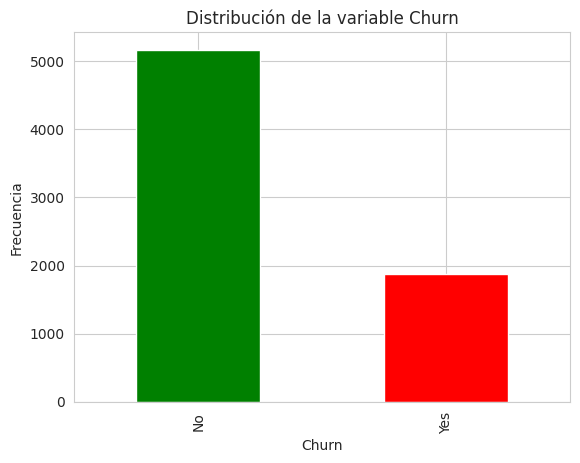

In [ ]:
datos['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

#####Evaluación del desbalance de las clases

Existe un desbalance entre las clases si y no, dónde sí tiene 73.5%(clase mayoritaria) aproximadamente y no tiene un 26.5% (clase minoritaria).

Lo antes expresado puede afectar el rendimiento de algunos modelos predictivos, donde el modelo puede sesgarse hacia la clase mayoritaria y siempre predecir que no hay evasión. Además que algunas métricas pueden ser bajas para el caso de las clases minoritaria.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

****Balanceo de clases ( Opcional)****

#####Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Crear pipeline con SMOTE + modelo
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenar (SMOTE se aplica automáticamente en el entrenamiento)
pipeline.fit(X_train, y_train)

# Predecir sobre test (sin balancear)
y_pred = pipeline.predict(X_test)

# Evaluar
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1294
           1       0.54      0.77      0.63       467

    accuracy                           0.76      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.76      0.78      1761



****Normalización y estandarización( Sí es necesario)****

#####Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

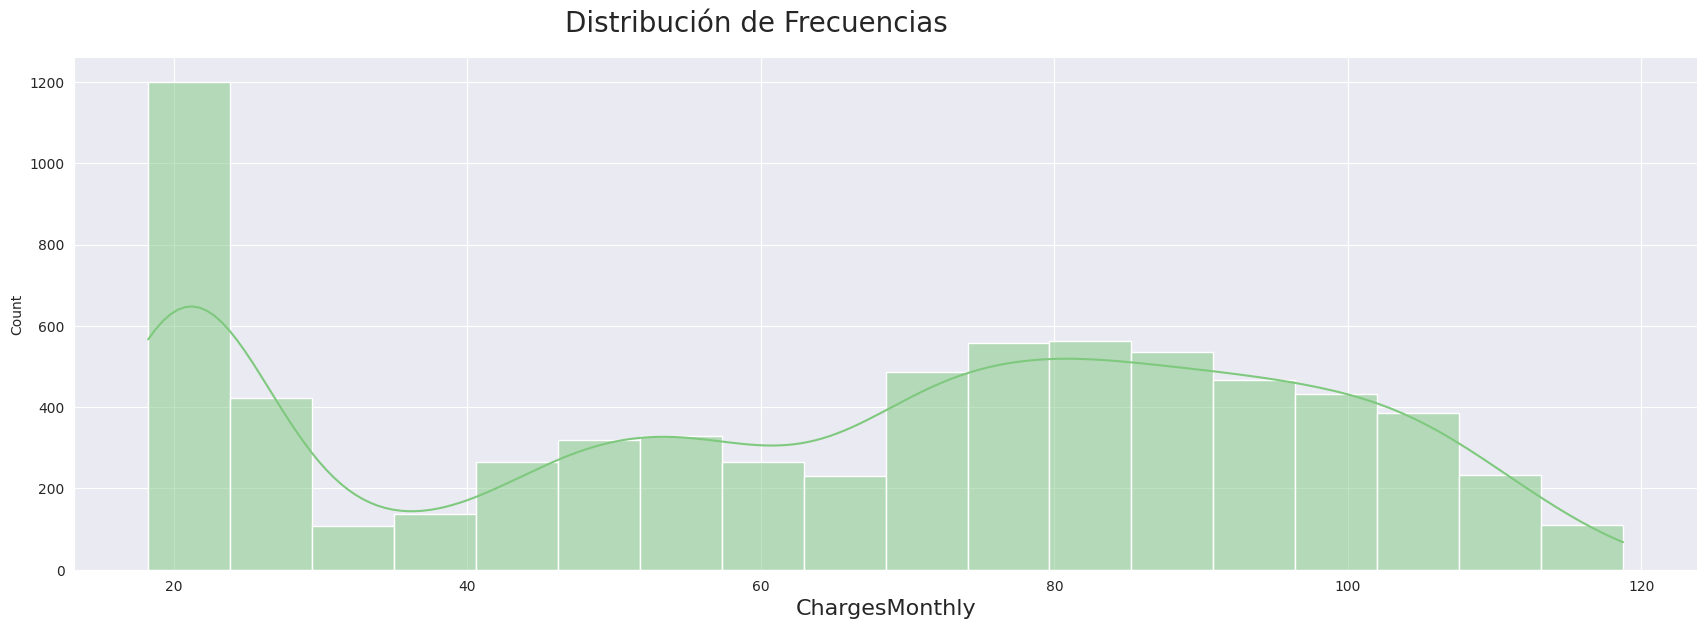

In [ ]:
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")
ax = sns.displot(datos['ChargesMonthly'],kde=True)
ax.figure.set_size_inches(20,6)
ax.fig.suptitle('Distribución de Frecuencias',fontsize=20,y=1.05)
ax.set_xlabels('ChargesMonthly',fontsize=16)
ax;

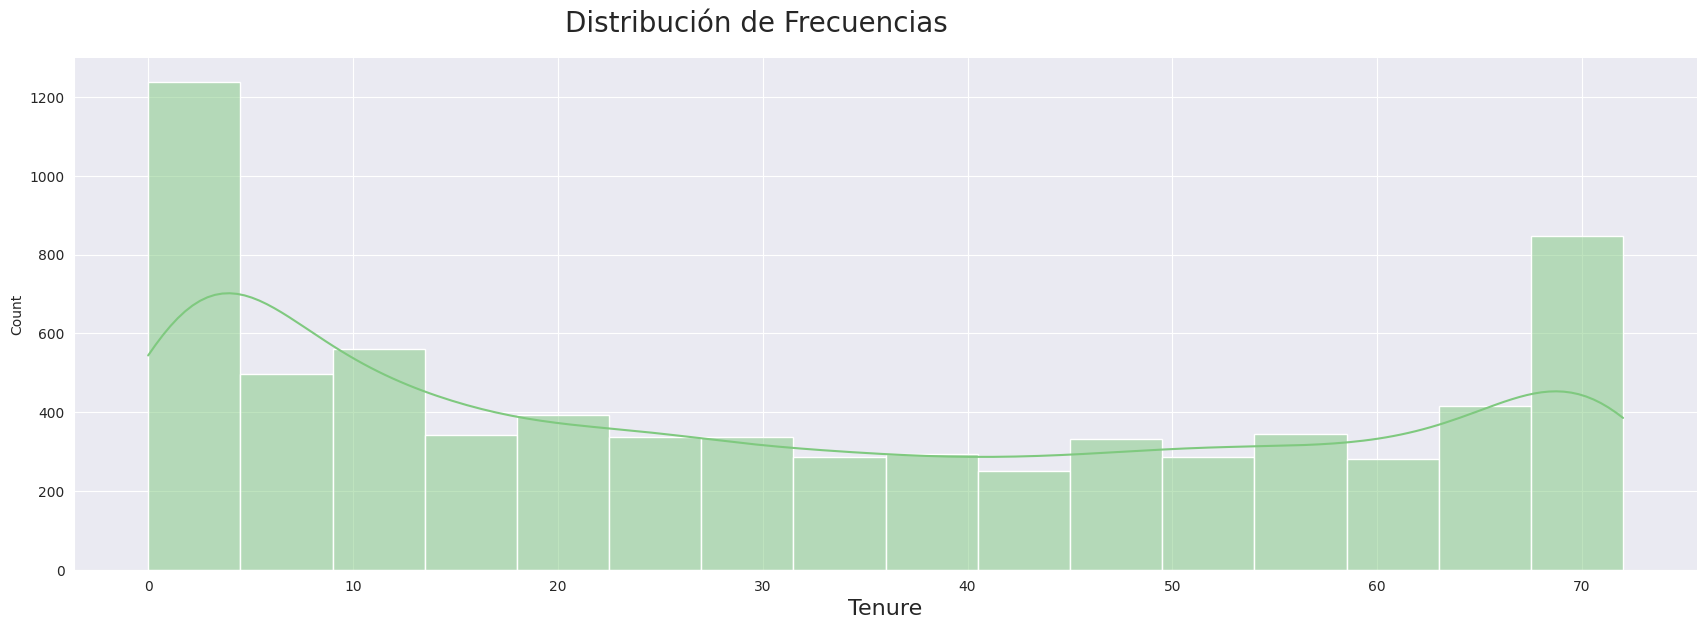

In [ ]:

sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")
ax = sns.displot(datos['Tenure'],kde=True)
ax.figure.set_size_inches(20,6)
ax.fig.suptitle('Distribución de Frecuencias',fontsize=20,y=1.05)
ax.set_xlabels('Tenure',fontsize=16)
ax;

In [ ]:
datos['log_Tenure'] = np.log(datos['Tenure']+1)
datos['log_ChargesMonthly'] = np.log(datos['ChargesMonthly'])
datos['log_ChargesTotal'] = np.log(datos['ChargesTotal']+1)

In [ ]:
datos.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,log_Tenure,log_ChargesMonthly,log_ChargesTotal
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.302585,4.183576,6.387384
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.302585,4.092677,6.297846
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1.609438,4.302713,5.641375
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,2.639057,4.584967,7.121939
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1.386294,4.429626,5.592478


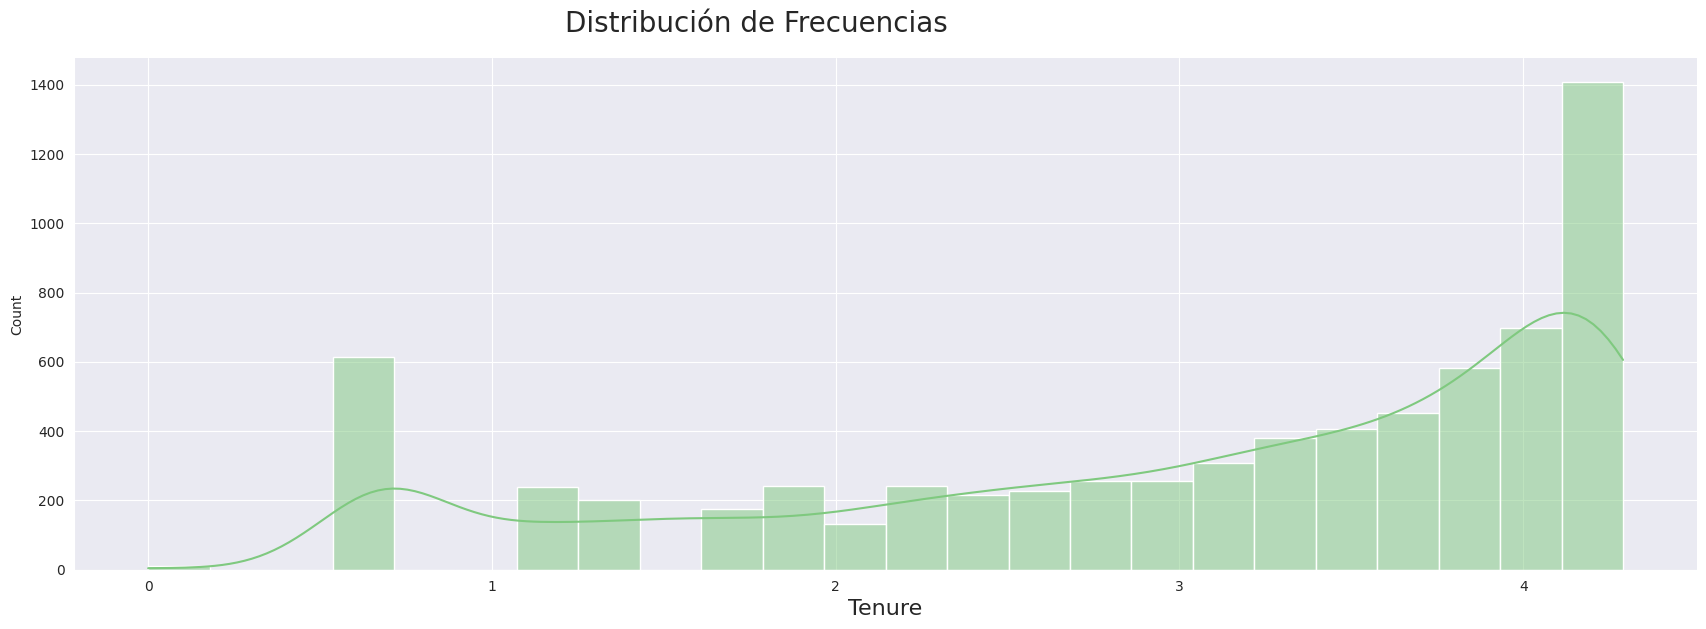

In [ ]:
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")
ax = sns.displot(datos['log_Tenure'],kde=True)
ax.figure.set_size_inches(20,6)
ax.fig.suptitle('Distribución de Frecuencias',fontsize=20,y=1.05)
ax.set_xlabels('Tenure',fontsize=16)
ax;

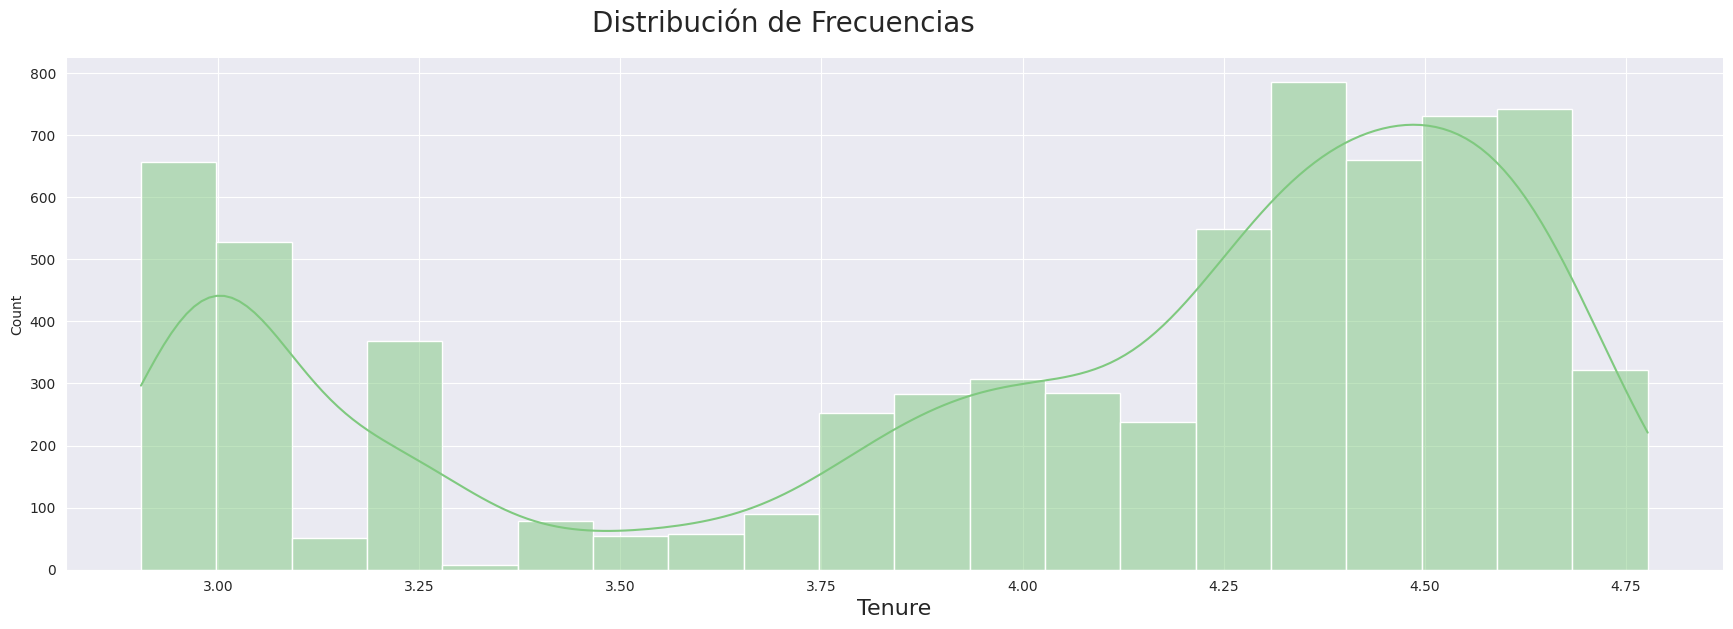

In [ ]:
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")
ax = sns.displot(datos['log_ChargesMonthly'],kde=True)
ax.figure.set_size_inches(20,6)
ax.fig.suptitle('Distribución de Frecuencias',fontsize=20,y=1.05)
ax.set_xlabels('Tenure',fontsize=16)
ax;

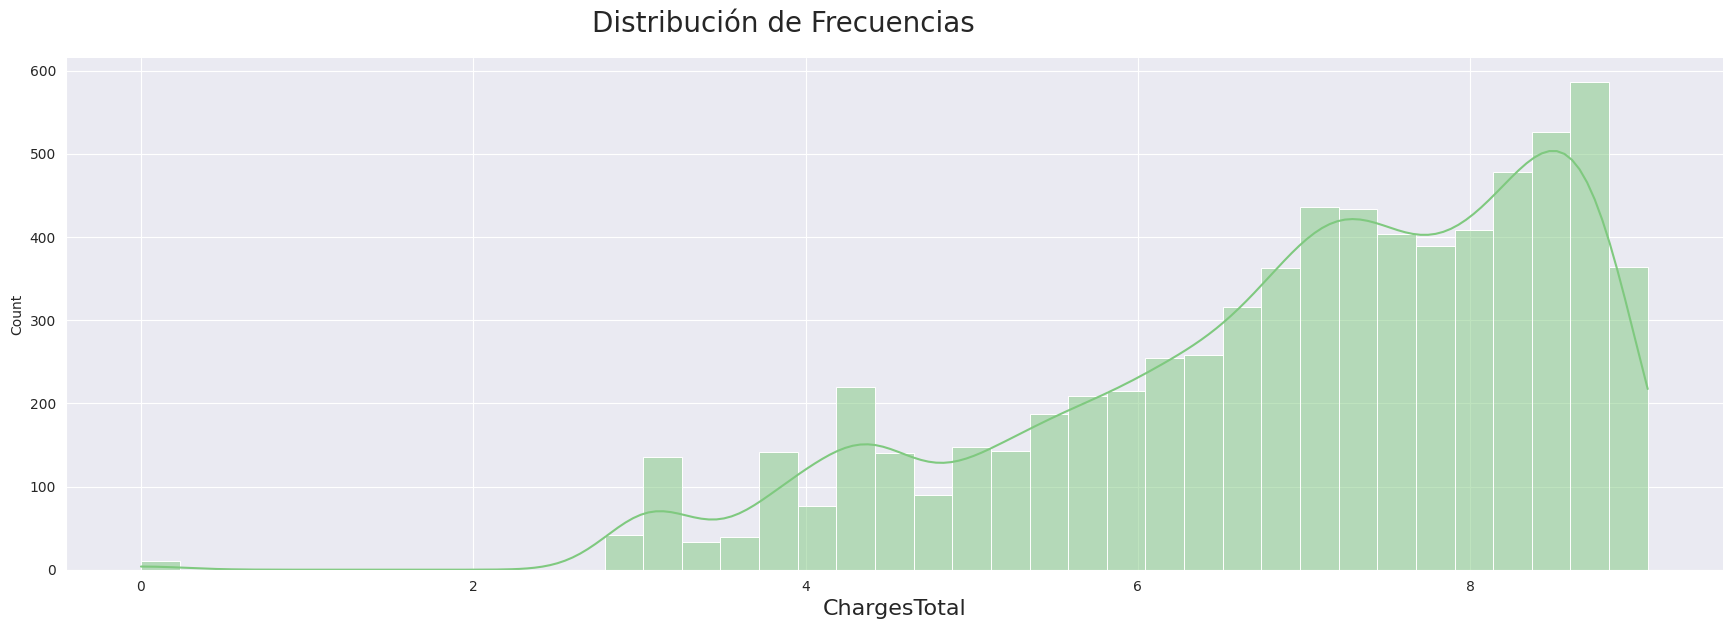

In [ ]:
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")
ax = sns.displot(datos['log_ChargesTotal'],kde=True)
ax.figure.set_size_inches(20,6)
ax.fig.suptitle('Distribución de Frecuencias',fontsize=20,y=1.05)
ax.set_xlabels('ChargesTotal',fontsize=16)
ax;

#####Se puede notar que no es suficiente aplicar logaritmos

##### Escalar solo las columnas numericas

In [ ]:
normalizacion=MinMaxScaler()
x_train_normalizado=normalizacion.fit_transform(X_train)
pd.DataFrame(x_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.847222,0.429851,0.431921
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.958333,0.429851,0.475682
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.652778,0.663682,0.462653
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.986111,0.902985,0.882208
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.254229,0.062287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.375000,0.319403,0.162508
5278,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.486111,0.944776,0.450678
5279,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.361111,0.331343,0.149157
5280,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.041667,0.270647,0.016316


# 🎯 Correlación y selección de variables

****Análisis de correlación****

#####Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

#####Matriz de correlación

In [ ]:
Correlacion=datos.corr(numeric_only=True)
Correlacion

,Tenure,ChargesMonthly,ChargesTotal,log_Tenure,log_ChargesMonthly,log_ChargesTotal
Tenure,1.000000,0.247900,0.826178,0.913631,0.197037,0.829096
ChargesMonthly,0.247900,1.000000,0.651174,0.239706,0.976392,0.570764
ChargesTotal,0.826178,0.651174,1.000000,0.733472,0.584845,0.825761
log_Tenure,0.913631,0.239706,0.733472,1.000000,0.193751,0.923624
log_ChargesMonthly,0.197037,0.976392,0.584845,0.193751,1.000000,0.541579
log_ChargesTotal,0.829096,0.570764,0.825761,0.923624,0.541579,1.000000


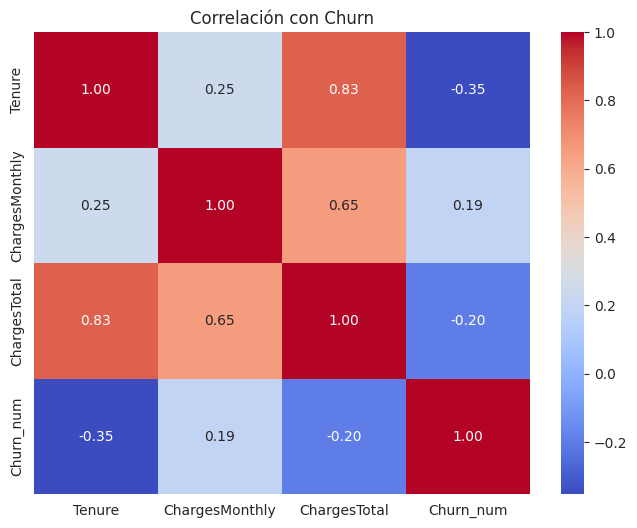

ChargesMonthly    0.193356
ChargesTotal     -0.198324
Tenure           -0.352229
Name: Churn_num, dtype: float64


In [ ]:
# Suponiendo que 'datos' tiene las columnas originales
datos['Churn_num'] = datos['Churn'].map({'Yes': 1, 'No': 0})
# Convertir 'SeniorCitizen' a valores numéricos
datos['SeniorCitizen'] = datos['SeniorCitizen'].map({'Yes': 1, 'No': 0})

# Definir variables numéricas a incluir
num_vars = ['Tenure', 'ChargesMonthly', 'ChargesTotal', 'Churn_num']

# Calcular correlación
corr = datos[num_vars].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación con Churn')
plt.show()

# Mostrar solo las correlaciones con Churn ordenadas
print(corr['Churn_num'].drop('Churn_num').sort_values(ascending=False))

****Análisis dirigido****

######Investiga cómo variables específicas se relacionan con la cancelación, tales como:
•
Tiempo de contrato × Cancelación

•
Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

#####Tiempo de contrato x Cancelación

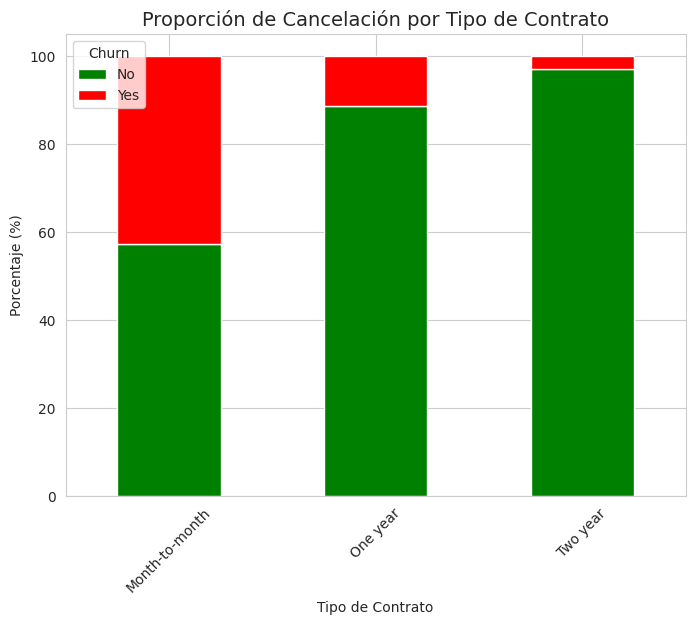

In [ ]:

# Configurar el estilo de las gráficas
sns.set_style("whitegrid")

# --- Gráfico 1: Proporción de Churn por Tipo de Contrato ---
# Calculamos el porcentaje de churn dentro de cada categoría de contrato
contract_churn = datos.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

# Graficamos como barras apiladas al 100%
ax = contract_churn.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8,6))
plt.title('Proporción de Cancelación por Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

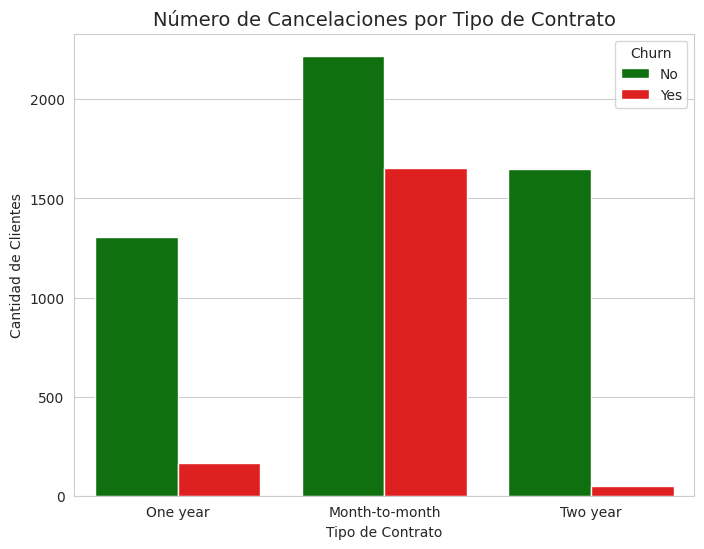

In [ ]:
# También podemos ver el recuento absoluto con un countplot
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Contract', hue='Churn', palette=['green', 'red'])
plt.title('Número de Cancelaciones por Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.show()

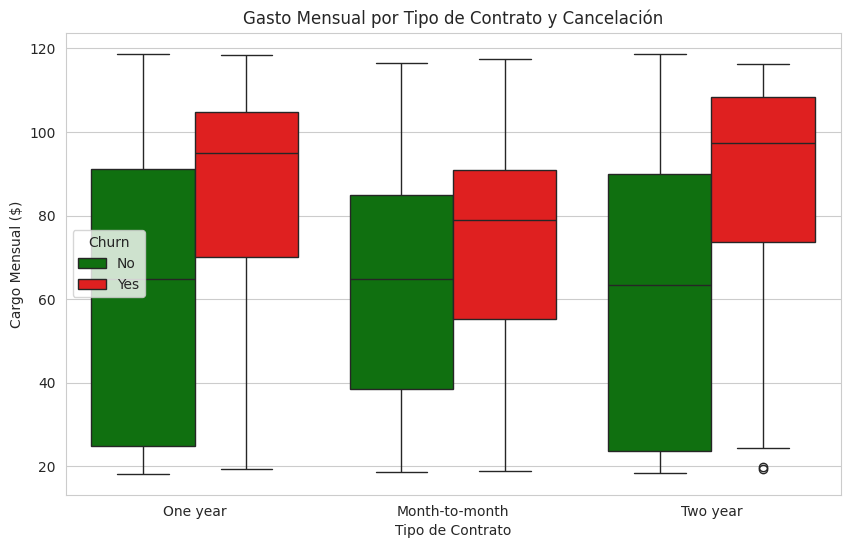

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=datos, x='Contract', y='ChargesMonthly', hue='Churn', palette=['green', 'red'])
plt.title('Gasto Mensual por Tipo de Contrato y Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cargo Mensual ($)')
plt.show()

##### A mayor costo del plan los clientes tienden a abandonar o cancelar.

#####Gasto total x Cancelación

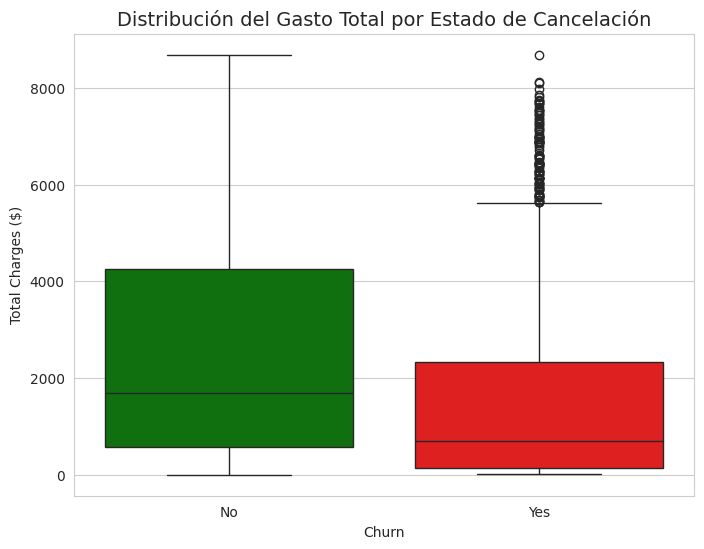

In [ ]:
# --- Gráfico 3: Boxplot de Gasto Total segmentado por Churn ---
plt.figure(figsize=(8,6))
sns.boxplot(data=datos, x='Churn', y='ChargesTotal',hue='Churn', palette=['green', 'red'])
plt.title('Distribución del Gasto Total por Estado de Cancelación', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Total Charges ($)')
plt.show()

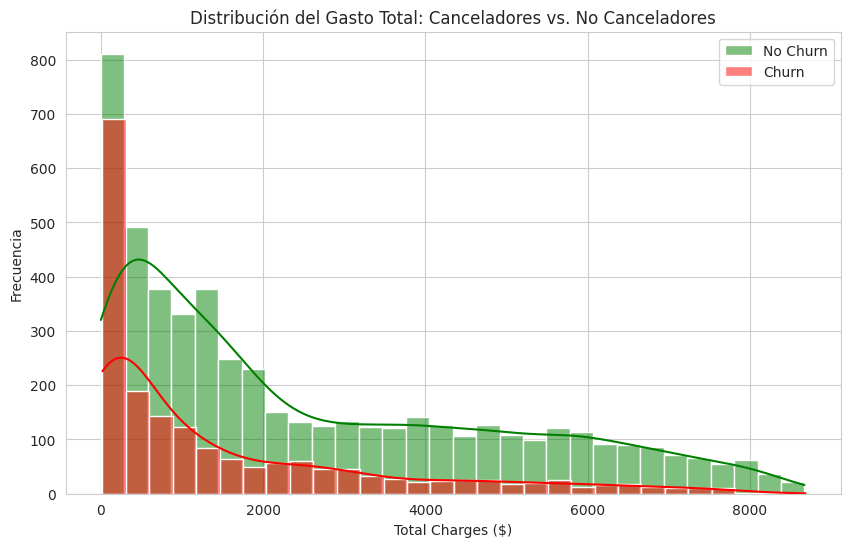

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=datos[datos['Churn']=='No'], x='ChargesTotal', color='green', label='No Churn', kde=True, bins=30, alpha=0.5)
sns.histplot(data=datos[datos['Churn']=='Yes'], x='ChargesTotal', color='red', label='Churn', kde=True, bins=30, alpha=0.5)
plt.title('Distribución del Gasto Total: Canceladores vs. No Canceladores')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

#### Gasto mensual x Cancelación

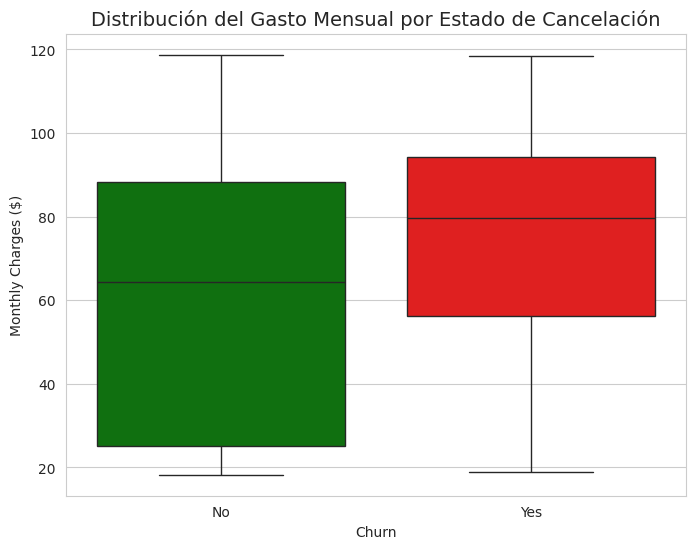

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(data=datos, x='Churn', y='ChargesMonthly',hue='Churn', palette=['green', 'red'])
plt.title('Distribución del Gasto Mensual por Estado de Cancelación', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show();

##### En este boxplot se puede observar que los clientes con mayor gasto mensual son los que cancelan(Churn)

# 🤖 Modelo predictivo

****Separación de datos****

#####Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

****Creación de modelos****

#####Crea al menos dos modelos diferentes para predecir la cancelación de clientes.
•
Un modelo puede requerir normalización, como Regresión Logística o KNN.

•
El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest

.
💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.
Justificación:

•
Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

•
Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.
Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

#####Modelo baseline

In [ ]:
dummy=DummyClassifier()
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)

0.7348097671777399

#####Modelo Árbol de decisión

In [ ]:
arbol=DecisionTreeClassifier()
arbol.fit(X_train,y_train)
DecisionTreeClassifier (random_state=5)

DecisionTreeClassifier(random_state=5)

In [ ]:
arbol.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
arbol.score(X_test,y_test)

0.7314026121521863

#####KNN

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train_normalizado,y_train)

KNeighborsClassifier()

In [ ]:
x_test_normalizado=normalizacion.transform(X_test)

In [ ]:
knn.score(x_test_normalizado,y_test)

0.778534923339012

#####Random Forest

In [ ]:
# Crear clasificador Random Forest con random_state fijo para reproducibilidad
rf = RandomForestClassifier(random_state=5)

# Entrenar con tus datos de entrenamiento (X_train, y_train)
rf.fit(X_train, y_train)

# Ahora puedes hacer predicciones, por ejemplo:
y_pred_rf = rf.predict(X_test)

In [ ]:
rf.score(X_test,y_test)

0.7938671209540034

##### Regresión logística

In [ ]:


# Crear el modelo de regresión logística con random_state fijo
logreg = LogisticRegression(random_state=5)

# Entrenar con tus datos de entrenamiento
logreg.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [ ]:
logreg.score(X_test,y_test)

0.817717206132879

##### Redes neuronales

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # salida binaria (churn o no)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar
model.fit(X_train, y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6608 - loss: 0.5869 - val_accuracy: 0.7967 - val_loss: 0.4286
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7900 - loss: 0.4312 - val_accuracy: 0.8041 - val_loss: 0.4207
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8008 - loss: 0.4088 - val_accuracy: 0.8064 - val_loss: 0.4167
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4188 - val_accuracy: 0.8160 - val_loss: 0.4133
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4177 - val_accuracy: 0.8109 - val_loss: 0.4131
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8089 - loss: 0.4174 - val_accuracy: 0.8120 - val_loss: 0.4141
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4177 - val_accuracy: 0.8109 - val_loss: 0.4124
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.4143 - val_accuracy: 0.8012 - val_

****Evaluación de los modelos****

#####Evalúa cada modelo utilizando las siguientes métricas:
•
Exactitud (Acurácia)

•
Precisión

•
Recall

•
F1-score

•
Matriz de confusión
Después, realiza un análisis crítico y compara los modelos:

•
¿Cuál modelo tuvo el mejor desempeño?

•
¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

•
Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

•
Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

#####Exactitud

In [ ]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud modelo_arbol: {arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(x_test_normalizado, y_test)}')
print(f'Exactitud Random Forest: {rf.score(X_test, y_test)}')

Exactitud Dummy: 0.7348097671777399
Exactitud modelo_arbol: 0.7314026121521863
Exactitud KNN: 0.778534923339012
Exactitud Random Forest: 0.7938671209540034


####Matriz de confusión

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

#####Modelo de árbol de decisión

In [ ]:
y_previsto = arbol.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1068  226]
 [ 247  220]]


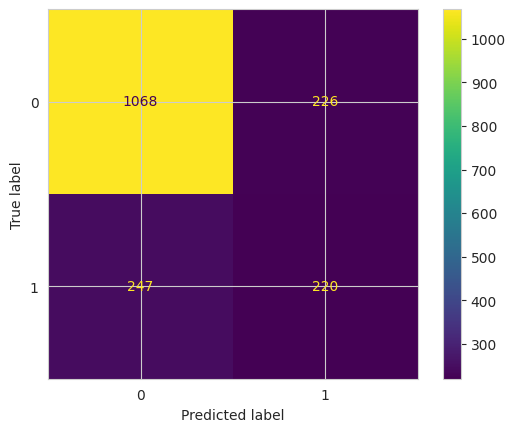

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

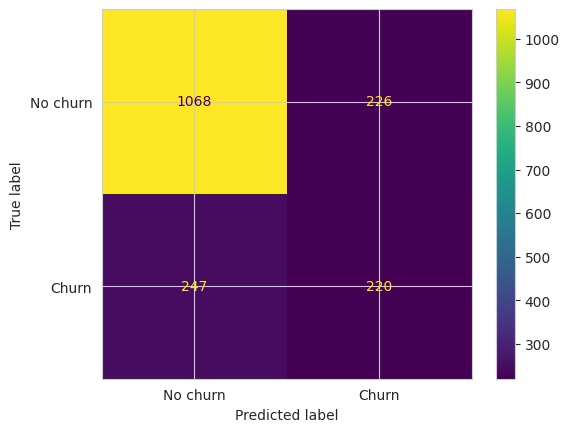

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No churn','Churn'])
visualizacion.plot();

La matriz de confusión para el modelo árbol de decisión indica que:

• Verdaderos negativos: El modelo predijo correctamente que no cancelarían 1067 clientes.

• Falsos positivos: El modelo predijo erróneamente que. 227 clientes cancelarían y realmente eran clientes que no cancelarían.

• Falsos negativos: El modelo predijo que 241 no cancelarían. Y realmente si cancelaron.

• Verdaderos positivos: El modelo predijo que cancelarían 226 clientes y realmente si cancelaron.

   Está matriz indica que el modelo tiene un buen desempeño para identificar a los que no cancelaron, pero falla realmente en detectar los clientes que abandonan o cancelan.

#####Modelo Dummy

In [ ]:
y_previsto = dummy.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1294    0]
 [ 467    0]]


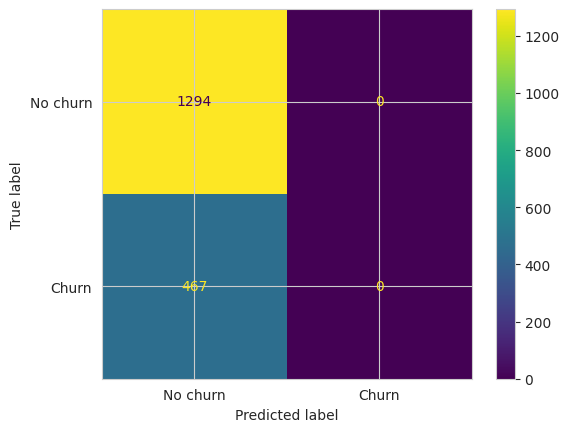

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No churn','Churn'])
visualizacion.plot();

La matriz de confusión indica que el modelo Dummy solo predice quienes son los clientes que no cancelaran. Es decir la clase mayoritaria.

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.0
La sensibilidad (Recall) del modelo es: 0.0
El F1-score del modelo es: 0.0
La exactitud (accuracy) del modelo es: 0.7348097671777399


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



##### Modelo KNN

In [ ]:
y_previsto = knn.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1108  186]
 [ 204  263]]


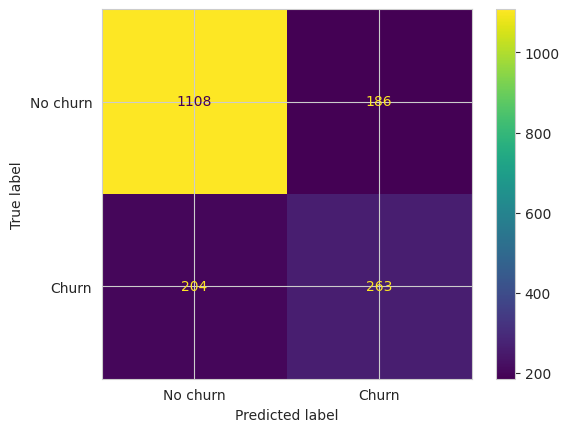

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No churn','Churn'])
visualizacion.plot();

La matriz de confusión del modelo KNN indica que:

• Verdaderos negativos: El modelo predijo correctamente que no cancelarían 1108 clientes.

• Falsos positivos: El modelo predijo erróneamente que. 186 clientes cancelarían y realmente eran clientes que no cancelarían.

• Falsos negativos: El modelo predijo que 204 no cancelarían. Y realmente si cancelaron.

• Verdaderos positivos: El modelo predijo que cancelarían 263 clientes y realmente si cancelaron.

Está matriz indica que el modelo tiene un buen desempeño para identificar a los que no cancelaron, pero falla realmente en detectar los clientes que abandonan o cancelan.

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.5857461024498887
La sensibilidad (Recall) del modelo es: 0.563169164882227
El F1-score del modelo es: 0.574235807860262
La exactitud (accuracy) del modelo es: 0.778534923339012


##### Redes neuronales

In [ ]:
y_previsto_proba = model.predict(X_val)
y_previsto = (y_previsto_proba > 0.3).astype(int)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1083  211]
 [ 150  317]]


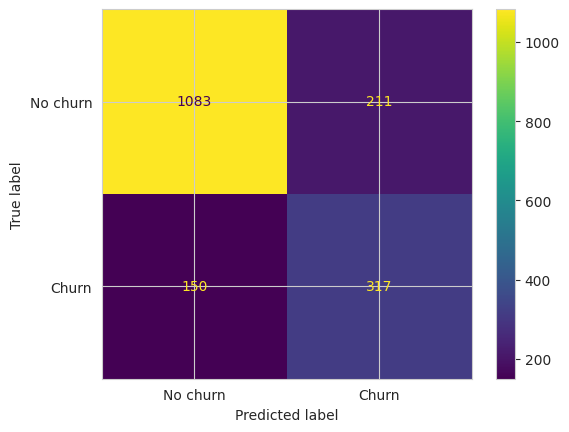

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No churn','Churn'])
visualizacion.plot();

La matriz de confusión del modelo Redes neuronales indica que:

• Verdaderos negativos: El modelo predijo correctamente que no cancelarían 1034 clientes.

• Falsos positivos: El modelo predijo erróneamente que 260 clientes cancelarían y realmente eran clientes que no cancelarían.

• Falsos negativos: El modelo predijo que 135 no cancelarían. Y realmente si cancelaron.

• Verdaderos positivos: El modelo predijo que cancelarían 332 clientes y realmente si cancelaron.

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.6003787878787878
La sensibilidad (Recall) del modelo es: 0.6788008565310493
El F1-score del modelo es: 0.6371859296482412
La exactitud (accuracy) del modelo es: 0.7950028392958546


#### Modelo Random Forest

In [ ]:
y_previsto = rf.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1175  119]
 [ 244  223]]


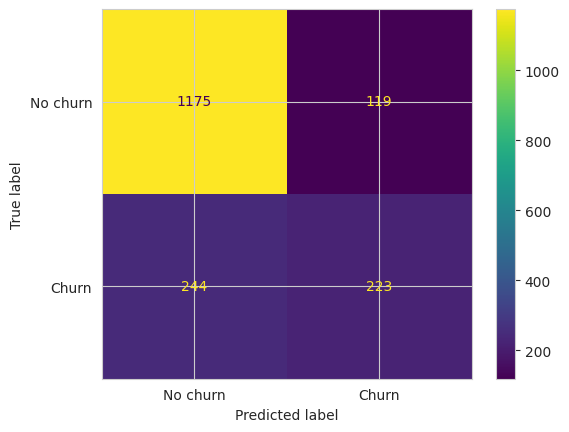

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No churn','Churn'])
visualizacion.plot();

La matriz de confusión del modelo Random Forest indica que:

• Verdaderos negativos: El modelo predijo correctamente que no cancelarían 1175 clientes.

• Falsos positivos: El modelo predijo erróneamente que 119 clientes cancelarían y realmente eran clientes que no cancelarían.

• Falsos negativos: El modelo predijo que 244 no cancelarían. Y realmente si cancelaron.

• Verdaderos positivos: El modelo predijo que cancelarían 223 clientes y realmente si cancelaron.

Está matriz indica que el modelo tiene Mayor precisión y menor falsas alarmas.

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.652046783625731
La sensibilidad (Recall) del modelo es: 0.47751605995717344
El F1-score del modelo es: 0.5512978986402967
La exactitud (accuracy) del modelo es: 0.7938671209540034


##### Modelo regresión logística

In [ ]:
y_previsto = logreg.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1177  117]
 [ 204  263]]


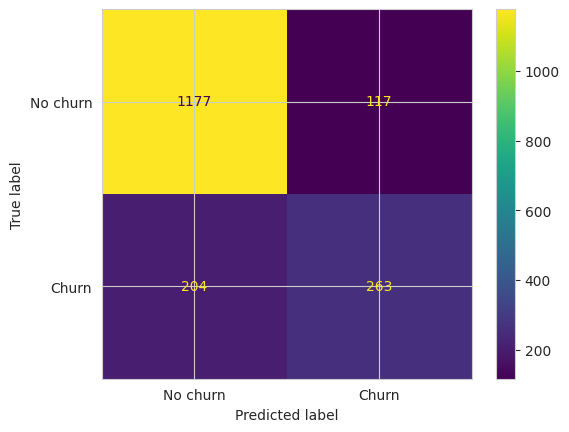

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No churn','Churn'])
visualizacion.plot();

La matriz de confusión del modelo Regresión logística indica que:

• Verdaderos negativos: El modelo predijo correctamente que no cancelarían 1034 clientes.

• Falsos positivos: El modelo predijo erróneamente que 260 clientes cancelarían y realmente eran clientes que no cancelarían.

• Falsos negativos: El modelo predijo que 135 no cancelarían. Y realmente si cancelaron.

• Verdaderos positivos: El modelo predijo que cancelarían 332 clientes y realmente si cancelaron.

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.6921052631578948
La sensibilidad (Recall) del modelo es: 0.563169164882227
El F1-score del modelo es: 0.6210153482880756
La exactitud (accuracy) del modelo es: 0.817717206132879


#📋 Interpretación y conclusiones

****Análisis de la importancia de las variables****

##### 1• Tenure(Antigüedad): Clientes con poca antigüedad tiene mucho más riesgo de cancelar.

2•ChargesMonthly( Cargo mensual): A mayor cargo mensual mayor riesgo de cancelar.

3•Tipo de contrato

4• Servicios adicionales: Reduce el riesgo.

5• InternetService: Los clientes con fibra óptica muestran mayor prospección a cancelar que los que tienen DSL.

6• Métodos de pagos: Pagos automáticos con transferencia bancaria muestran menos churn.

****Conclusión****

#####

•Resumen ejecutivo:

El presente informe detalla los resultados del análisis de cancelación de los clientes de la empresa de Telecom X. Se evaluaron múltiples modelos predictivos y se identificaron los valores de riesgos más significativos. Los modelos de Regresión Logística y redes neuronales con umbral ajustado mostraron el mejor desempeño, logrando detectar la mayor cantidad de cancelaciones con un equilibrio aceptable de falsas alarmas. Las principales causas de Churn son:

1• Alto costo mensual.

2• Contratos de corto plazo.

3• Baja antigüedad del cliente (Clientes nuevos)

• Variables analizadas:

Se incluyeron variables numéricas y categóricas luego de aplicar One hot encoding.

• Modelos evaluados:

1. Dummy

2. Árbol de decisión

3. KNN

4. Random Forest

5. Redes Neuronales

6. Regresión logística

• Métrica principal:

Dado el desbalance de las clases, aproximadamente 27% de cancelaciones. Se priorizó el Recall(Sensibilidad) para la clase Churn complementado con precisión y F1-score.

• Estrategias de retención:

1. Ofertas de migración: Ofrecer incentivos para migrar a contratos anuales.

2. Revisión del valor: Contactar al cliente y preguntar si se siente satisfecho con el precio y el servicio.

3. Personalización de los planes: Ajustar los planes y ofrecer planes más económicos.